<a href="https://colab.research.google.com/github/murathan9165/demo-zipfs-law/blob/main/iphs200_data_zipfs_law_20251028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries required

In [ ]:
from operator import itemgetter
import nltk
import pandas as pd
from nltk.corpus import stopwords
from matplotlib import pyplot as plt

In [ ]:
nltk.download('gutenberg')
nltk.download('stopwords')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Initialize frequency, and import all the words in a corpus

In [ ]:
frequency = {}

stop_words = set(stopwords.words('english'))  # FIX ERROR

gutenburg_books = nltk.corpus.gutenberg.fileids()
gutenburg_books

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
Book_Name = "austen-emma.txt" #@param ['austen-emma.txt','austen-sense.txt','carroll-alice.txt','chesterton-thursday.txt','melville-moby_dick.txt','shakespeare-macbeth.txt']

Keep_Stopwords = True #@param {type:"boolean"}



## Convert to lower case and remove stop words

In [ ]:
words_doc = nltk.Text(nltk.corpus.gutenberg.words(Book_Name))

words_doc = [word.lower() for word in words_doc if word.isalpha()]

if not(Keep_Stopwords):   # FIX ERROR
  words_doc = [word for word in words_doc if word not in stop_words]

## Calculate the frequency of the words inside

In [ ]:
for word in words_doc:
    count = frequency.get(word , 0)
    frequency[ word ] = count + 1

rank = 1
column_header = ['Rank', 'Frequency', 'Frequency * Rank']
df = pd.DataFrame( columns = column_header )
collection = sorted(frequency.items(), key=itemgetter(1), reverse = True)

## Creating a table for frequency * rank


In [ ]:
%%time

for word , freq in collection:
    df.loc[word] = [rank, freq, rank*freq]
    rank = rank + 1

print(df)

              Rank  Frequency  Frequency * Rank
to               1       5239              5239
the              2       5201             10402
and              3       4896             14688
of               4       4291             17164
i                5       3178             15890
...            ...        ...               ...
stare         7075          1              7075
deficiencies  7076          1              7076
predictions   7077          1              7077
band          7078          1              7078
finis         7079          1              7079

[7079 rows x 3 columns]
CPU times: user 8.19 s, sys: 23 ms, total: 8.21 s
Wall time: 10.2 s


## Python visualization with pyplot

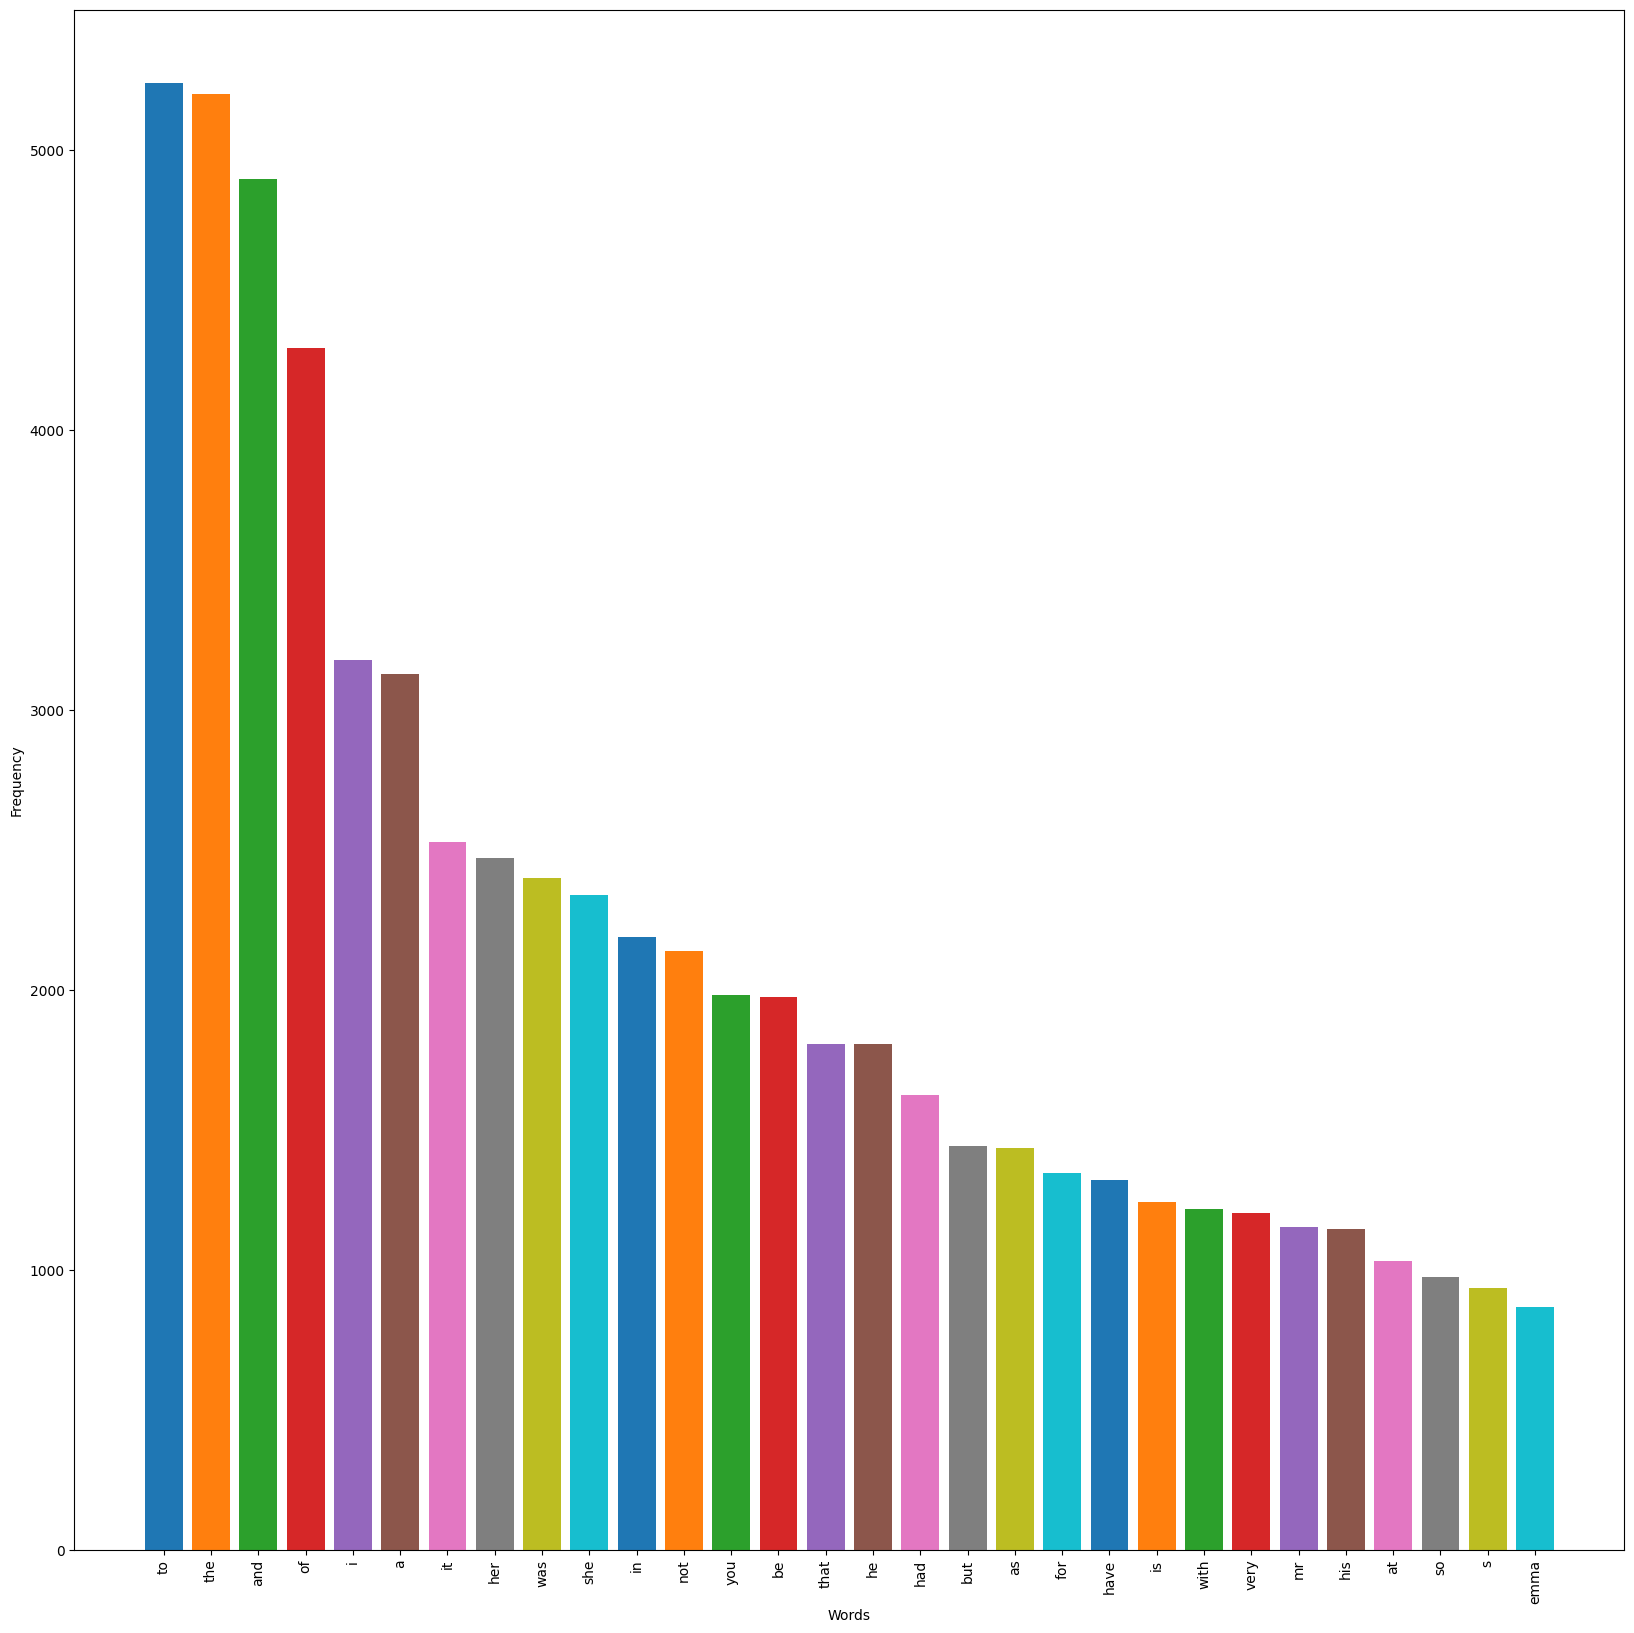

In [ ]:
plt.figure(figsize=(20,20))  #had to use this to increase the plot resolution
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.xticks(rotation=90)    #to rotate x-axis values

for word , freq in collection[:30]:
    plt.bar(word, freq)
plt.show()

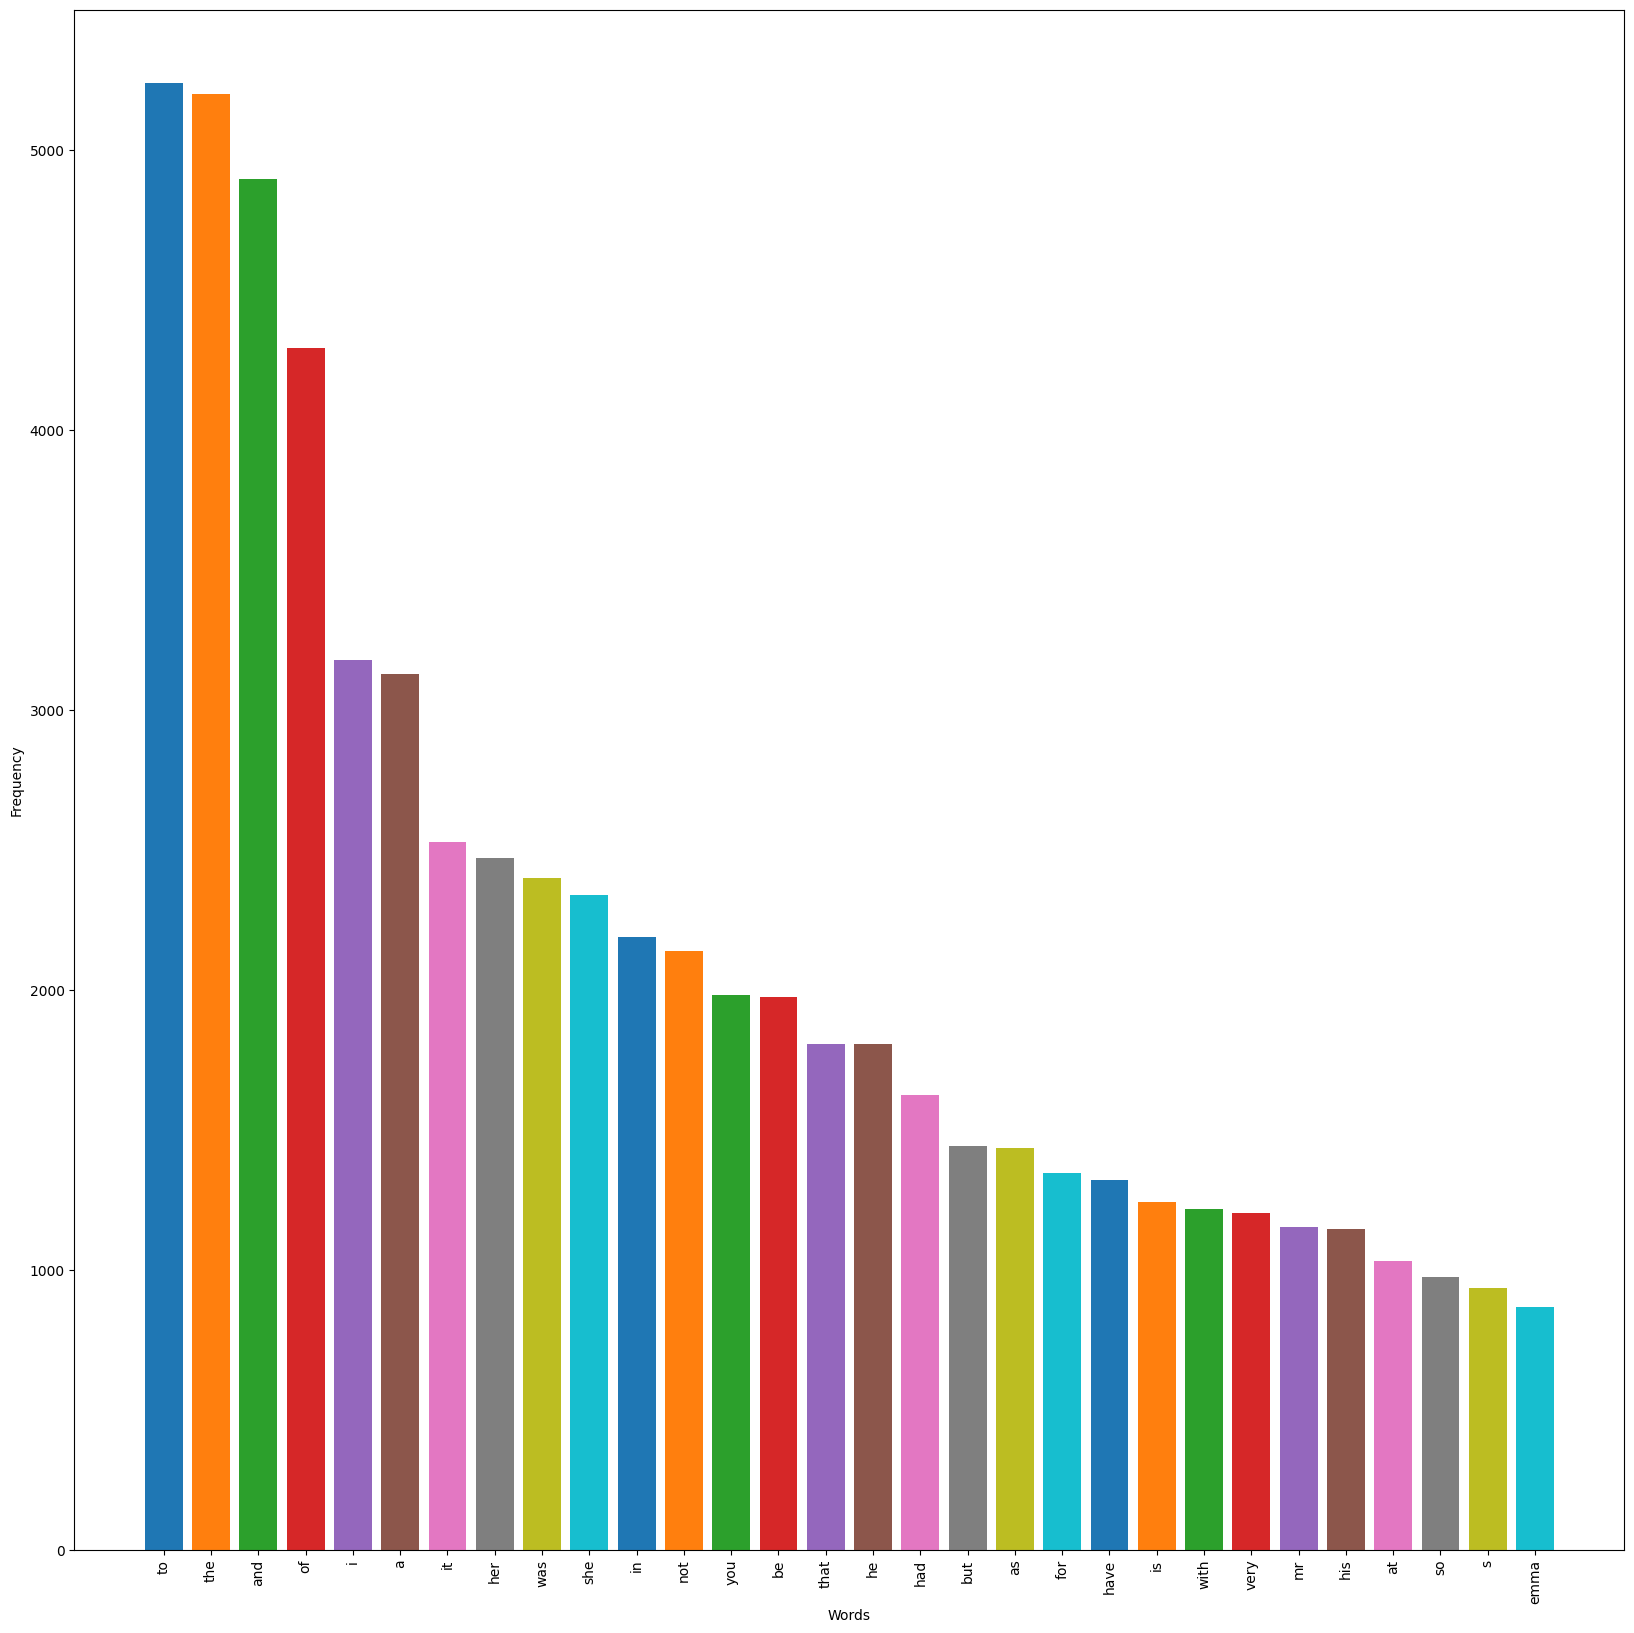

In [ ]:
plt.figure(figsize=(20,20))  #had to use this to increase the plot resolution
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.xticks(rotation=90)    #to rotate x-axis values

for word , freq in collection[:30]:
    plt.bar(word, freq)
plt.show()

## End of the program
